In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score 

data = pd.read_csv('shows.csv')

d = {'UK': 0, 'USA': 1, 'N': 2}
data['Nationality'] = data['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
data['Go'] = data['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = data[features]
y = data['Go']

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver="lbfgs")

#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
#‘liblinear’ is limited to one-versus-rest schemes.

# fit the model with data
logreg.fit(X,y)
print("Done Training")

Done Training


## Report

In [29]:
y_pred=logreg.predict(X)
print('Report')
print('\n',classification_report(y, y_pred))

Report

               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.86      0.86      0.86         7

    accuracy                           0.85        13
   macro avg       0.85      0.85      0.85        13
weighted avg       0.85      0.85      0.85        13



## Confusion Matrix

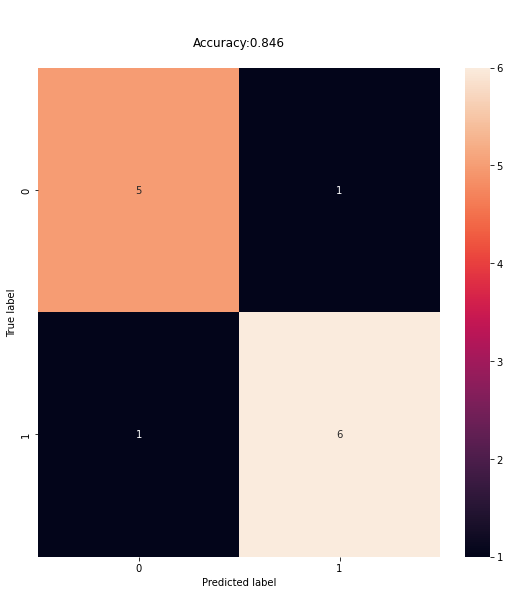

In [30]:
cnf_matrix = metrics.confusion_matrix(y, y_pred)
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in range(0,2)], columns = [i for i in range(0,2)])
sns.heatmap(df_cm, annot=True)
plt.title(' \n \nAccuracy:{0:.3f}\n'.format(accuracy_score(y, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Decision Boundary

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


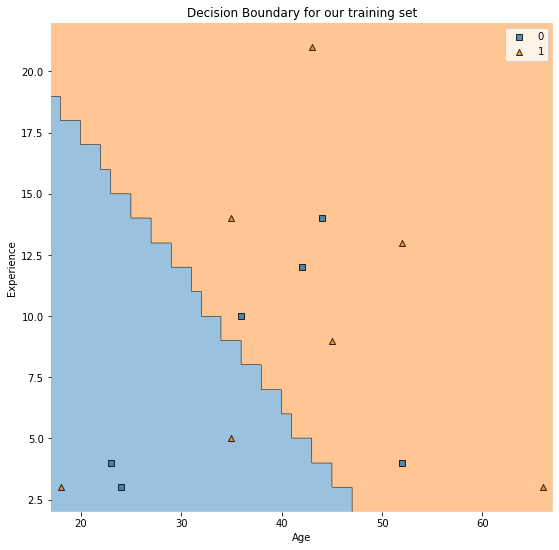

In [31]:
rcParams['figure.figsize'] = 9,9
plt.figure(3)   
y = np.array(y,dtype='int')
X= np.array(X)
X_train_reduce=np.append(np.array(X[:,0:1]),np.array(X[:,1:2]), axis=1)#Reduce our dataset to two dimensions.
logreg=logreg.fit(X_train_reduce, y)
plot_decision_regions(X=X_train_reduce, y=y,clf=logreg, legend=2)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.legend(loc="best")
plt.title('Decision Boundary for our training set')    
plt.show()